<a href="https://www.kaggle.com/code/emreustundag/pytorch-tutorial?scriptVersionId=111940920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## PyTorch Intro For Beginners

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research.

* [PyTorch Basics](#1)
* [Linear Regression](#2)
* [Logistic Regression](#3)
* [Artificial Neural Networks (ANNs)](#4)
* [Convolutional Neural Networks (CNNs)](#5)
* [Recurrent Neural Networks (RNNs)](#6)
* [Long Short Term Memory (LSTM)](#7)
* [Using GPU on PyTorch](#8)
* [Result](#9)

<a id = "1"></a>
### PyTorch Basics

In [1]:
# pytorch arrays
import torch
array = [[4,3,3],[1,2,5]]
tensor = torch.Tensor(array)
print("Array shape: ",tensor.shape)
print("Array type: ",tensor.type)
print(tensor)

Array shape:  torch.Size([2, 3])
Array type:  <built-in method type of Tensor object at 0x7fb8e5e02e90>
tensor([[4., 3., 3.],
        [1., 2., 5.]])


In [2]:
# pytorch ones
print(torch.ones((3,4)))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [3]:
# pytorch random
print(torch.rand((3,4)))

tensor([[0.5222, 0.3879, 0.5537, 0.0108],
        [0.5060, 0.3471, 0.4482, 0.3299],
        [0.3979, 0.1198, 0.2058, 0.6377]])


In [4]:
# random numpy array
import numpy as np
array = np.random.rand(2,2)
print("{} \n{}".format(type(array), array))

# from numpy to torch tensor
torch_tensor = torch.from_numpy(array)
print("{}\n".format(torch_tensor))

# tensor to numpy
array = torch_tensor.numpy()
print("{}\n".format(array))

<class 'numpy.ndarray'> 
[[0.16766771 0.31079059]
 [0.21899169 0.75361215]]
tensor([[0.1677, 0.3108],
        [0.2190, 0.7536]], dtype=torch.float64)

[[0.16766771 0.31079059]
 [0.21899169 0.75361215]]



##### Basic Mathematical Operations

In [5]:
# create tensor
tensor = torch.ones((3,3))
print(tensor)

# resize
print(tensor.view(tensor.shape[0] * tensor.shape[1]))

# add
print("Addition: {}\n".format(torch.add(tensor, tensor)))

# subtraction
print("Subtraction: {}\n".format(torch.sub(tensor, tensor)))

# element-wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

# element-wise division
print("Element wise division: {}\n".format(torch.div(tensor, tensor)))

# Mean
tensor = torch.Tensor([213,45,34,567,88,67])
print("Mean: {}\n".format(tensor.mean()))

# Standard deviation
print("Standard deviation: {}\n".format(tensor.std()))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 169.0

Standard deviation: 205.380615234375



##### Variables

The difference between variables and tensors is the variables accumulate gradients. For backpropagation we need variables..

In [6]:
# import variables from pytorch lib
from torch.autograd import Variable
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [7]:
# basic backpropagation
# lets assume we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print("y = ",y)

# recap o equation o = 1/2*sum(y)
o = 1/2*sum(y)
print("o = ",o)

# backward
o.backward()

# gradients
x.grad

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)


tensor([2., 4.])

<a id = "2"></a>
### Linear Regression

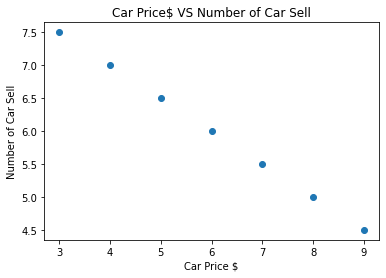

In [8]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [9]:
# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

epoch: 0, loss: 33.50492477416992
epoch: 50, loss: 4.329592227935791
epoch: 100, loss: 2.9256861209869385
epoch: 150, loss: 1.9770082235336304
epoch: 200, loss: 1.3359479904174805
epoch: 250, loss: 0.90275639295578
epoch: 300, loss: 0.6100307106971741
epoch: 350, loss: 0.41222405433654785
epoch: 400, loss: 0.2785571217536926
epoch: 450, loss: 0.18823279440402985
epoch: 500, loss: 0.1271970123052597
epoch: 550, loss: 0.08595205843448639
epoch: 600, loss: 0.058081019669771194
epoch: 650, loss: 0.039248187094926834
epoch: 700, loss: 0.026521142572164536
epoch: 750, loss: 0.01792141981422901
epoch: 800, loss: 0.012110203504562378
epoch: 850, loss: 0.008183498866856098
epoch: 900, loss: 0.005529941525310278
epoch: 950, loss: 0.003736842656508088
epoch: 1000, loss: 0.002525130519643426


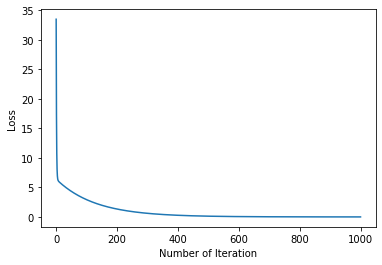

In [10]:
# create Linear Regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # accessing all things inherited from nn.Module
        super(LinearRegression,self).__init__()
        # linear function from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(car_price_tensor)
    
    # calculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss for each 50 iterations
    if(iteration % 50 == 0):
        print("epoch: {}, loss: {}".format(iteration, loss.data))
        
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()

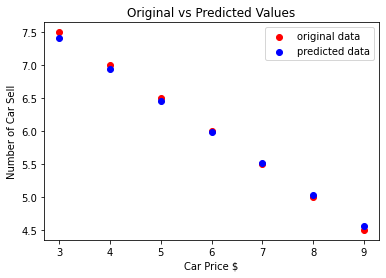

In [11]:
# predicted car prices
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted, label = "predicted data", color = "blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted Values")
plt.show()

<a id = "3"></a>
### Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. The Hosmer–Lemeshow test is a popular method to assess model fit.

Source: [https://www.ibm.com/topics/logistic-regression]

In [12]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# Prepare dataset
# load data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype = np.float32)

# split data into features (pixels) and labels (numbers from 0 to 9)
target = train_df.label.values

# normalization of pixels
features = train_df.loc[:,train_df.columns != "label"].values/255

# train-test split. train data: 80% and test data: 20
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# create tensors for train set
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create tensors for test set
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

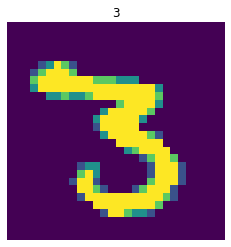

In [14]:
# visualize one of the image
plt.imshow(features[13].reshape(28,28))
plt.axis("off")
plt.title(str(int(target[13])))
plt.savefig("graph.png")
plt.show()

In [15]:
# create logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
# Instantiate model class
input_dim = 28 * 28  # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create model
model = LogisticRegressionModel(input_dim, output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
# training model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculate gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # prediction
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # forward propagation
                outputs = model(test)
                
                # get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # print loss
            print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8144183158874512 Accuracy: 66.10713958740234%
Iteration: 1000 Loss: 1.6117573976516724 Accuracy: 74.97618865966797%
Iteration: 1500 Loss: 1.3050669431686401 Accuracy: 78.28571319580078%
Iteration: 2000 Loss: 1.20177161693573 Accuracy: 79.9047622680664%
Iteration: 2500 Loss: 1.0359374284744263 Accuracy: 80.97618865966797%
Iteration: 3000 Loss: 0.948070228099823 Accuracy: 81.80952453613281%
Iteration: 3500 Loss: 0.9057233929634094 Accuracy: 82.47618865966797%
Iteration: 4000 Loss: 0.7513612508773804 Accuracy: 83.01190185546875%
Iteration: 4500 Loss: 0.9650315642356873 Accuracy: 83.58333587646484%
Iteration: 5000 Loss: 0.8104228973388672 Accuracy: 84.03571319580078%
Iteration: 5500 Loss: 0.7521653175354004 Accuracy: 84.16666412353516%
Iteration: 6000 Loss: 0.8632662296295166 Accuracy: 84.48809814453125%
Iteration: 6500 Loss: 0.6593930125236511 Accuracy: 84.61904907226562%
Iteration: 7000 Loss: 0.7223833203315735 Accuracy: 85.01190185546875%
Iteration: 7500 Loss: 0.6

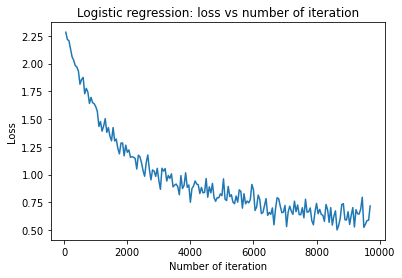

In [17]:
# evaluation
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic regression: loss vs number of iteration")
plt.show()

<a id = "4"></a>
### Artificial Neural Networks

Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning.

<img src="https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network4.png">

*Input Layer:*

As the name suggests, it accepts inputs in several different formats provided by the programmer.

*Hidden Layer:*

The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

*Output Layer:*

The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

In [18]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [19]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [20]:
# instantiate ANN
input_dim = 28*28
hidden_dim = 150
outout_dim = 10

# create ann model
model = ANNModel(input_dim, hidden_dim, output_dim)

# cross-entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [21]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.8049308657646179  Accuracy: 78.70237731933594 %
Iteration: 1000  Loss: 0.43496808409690857  Accuracy: 87.45237731933594 %
Iteration: 1500  Loss: 0.24016156792640686  Accuracy: 89.29762268066406 %
Iteration: 2000  Loss: 0.2913910746574402  Accuracy: 90.54762268066406 %
Iteration: 2500  Loss: 0.32659125328063965  Accuracy: 91.85713958740234 %
Iteration: 3000  Loss: 0.1260656714439392  Accuracy: 92.61904907226562 %
Iteration: 3500  Loss: 0.26449042558670044  Accuracy: 93.4047622680664 %
Iteration: 4000  Loss: 0.060829855501651764  Accuracy: 93.94047546386719 %
Iteration: 4500  Loss: 0.2975439429283142  Accuracy: 94.36904907226562 %
Iteration: 5000  Loss: 0.10394516587257385  Accuracy: 94.79762268066406 %
Iteration: 5500  Loss: 0.2003171741962433  Accuracy: 94.89286041259766 %
Iteration: 6000  Loss: 0.19839824736118317  Accuracy: 95.0952377319336 %
Iteration: 6500  Loss: 0.09088066965341568  Accuracy: 95.29762268066406 %
Iteration: 7000  Loss: 0.12737537920475006  A

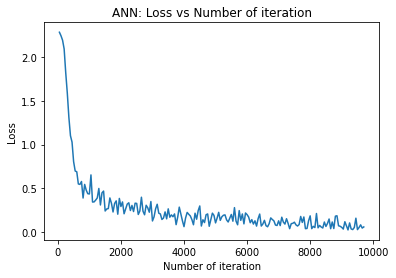

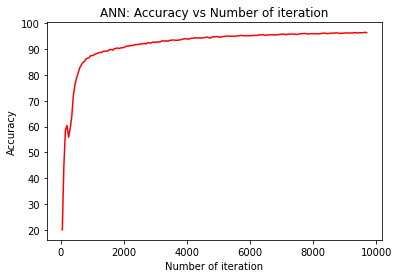

In [22]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()